In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [25]:
# --- Step 1: Load and Inspect the Dataset ---
# Load the dataset, skipping the first row which contains the report title.
try:
    df = pd.read_csv('/content/SY Data - Sheet1.csv', skiprows=1)
    print("File loaded successfully.")
except FileNotFoundError:
    print("Error: 'SY Data - Sheet1.csv' not found. Please make sure the file is in the same directory as the script.")
    exit()

File loaded successfully.


In [26]:
print(df.head())
print(df.tail())

   Sr No     PRN No             Student Name Year Academic Year  Semester  \
0      1  124B1B034  TALREJA TANMAY DEVANAND   SY       2025-26         1   
1      2  124B1B067    KURSANGE YASH SANTOSH   SY       2025-26         1   
2      3  124B1B174    ZAREKAR SIDDHI KISHOR   SY       2025-26         1   
3      4  124B1B080     MEHUL SRINIVAS PYATI   SY       2025-26         1   
4      5  124B1B309   GHULE VEDANT BABASAHEB   SY       2025-26         1   

  Pattern Division Course Code  \
0    2023        A   BSH23OE06   
1    2023        A   BSH23OE06   
2    2023        C   BSH23OE06   
3    2023        B   BSH23OE06   
4    2023        B   BSH23OE06   

                                         Course Name  Gender  
0  Open Elective : Neural Network and Fuzzy Logic...    Male  
1  Open Elective : Neural Network and Fuzzy Logic...    Male  
2  Open Elective : Neural Network and Fuzzy Logic...  Female  
3  Open Elective : Neural Network and Fuzzy Logic...    Male  
4  Open Elective 

In [27]:
print(df.describe())
print(df.info())

            Sr No  Semester
count  900.000000     900.0
mean   172.921111       1.0
std    138.368675       0.0
min      1.000000       1.0
25%     57.000000       1.0
50%    131.500000       1.0
75%    267.250000       1.0
max    492.000000       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sr No          900 non-null    int64 
 1   PRN No         900 non-null    object
 2   Student Name   900 non-null    object
 3   Year           900 non-null    object
 4   Academic Year  900 non-null    object
 5   Semester       900 non-null    int64 
 6   Pattern        775 non-null    object
 7   Division       900 non-null    object
 8   Course Code    900 non-null    object
 9   Course Name    900 non-null    object
 10  Gender         900 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.5+ KB
None


In [28]:
# --- Step 2: Removal of Duplicates (with Before & After display) ---
print("\n--- Handling Duplicates ---")
print(f"Shape of DataFrame BEFORE removing duplicates: {df.shape}")
print(f"Number of duplicate rows found: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

print(f"Shape of DataFrame AFTER removing duplicates:  {df.shape}")
print("---")


--- Handling Duplicates ---
Shape of DataFrame BEFORE removing duplicates: (900, 11)
Number of duplicate rows found: 0
Shape of DataFrame AFTER removing duplicates:  (900, 11)
---


In [29]:
# --- Step 3: Handle Missing Values ---
# Fill missing values in the 'Pattern' column with the mode.
print(f"Missing values in 'Pattern' before: {df['Pattern'].isnull().sum()}")
pattern_mode = df['Pattern'].mode()[0]
df['Pattern'].fillna(pattern_mode, inplace=True)
print("Missing values handled.")

Missing values in 'Pattern' before: 125
Missing values handled.


/tmp/ipython-input-1427277253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pattern'].fillna(pattern_mode, inplace=True)


In [30]:
# --- Step 4: Normalizing and Scaling Data ---
print("Applying scaling techniques...")
# Reshape the data because the scalers expect a 2D array
sr_no_reshaped = df[['Sr No']].values

Applying scaling techniques...


In [31]:
# a) Normalizing using Min-Max Scaler
min_max_scaler = MinMaxScaler()
df['Sr No_minmax'] = min_max_scaler.fit_transform(sr_no_reshaped)

In [32]:
# b) Scaling using Standard Scaler
standard_scaler = StandardScaler()
df['Sr No_standard'] = standard_scaler.fit_transform(sr_no_reshaped)

In [33]:
# c) Scaling using Robust Scaler
robust_scaler = RobustScaler()
df['Sr No_robust'] = robust_scaler.fit_transform(sr_no_reshaped)
print("Scaling complete.")

Scaling complete.


In [34]:
# --- Step 4: Display the Output ---
print("\n--- Output after Normalization & Scaling ---")
# Display the original column alongside the new scaled columns for comparison
print(df[['Sr No', 'Sr No_minmax', 'Sr No_standard', 'Sr No_robust']].head())


--- Output after Normalization & Scaling ---
   Sr No  Sr No_minmax  Sr No_standard  Sr No_robust
0      1      0.000000       -1.243177     -0.620690
1      2      0.002037       -1.235946     -0.615933
2      3      0.004073       -1.228714     -0.611177
3      4      0.006110       -1.221483     -0.606421
4      5      0.008147       -1.214252     -0.601665


In [35]:
# --- Step 5: Save the processed DataFrame ---
df.to_csv('SY_Data_Processed.csv', index=False)
print("Processed DataFrame saved to 'SY_Data_Processed.csv'")

Processed DataFrame saved to 'SY_Data_Processed.csv'


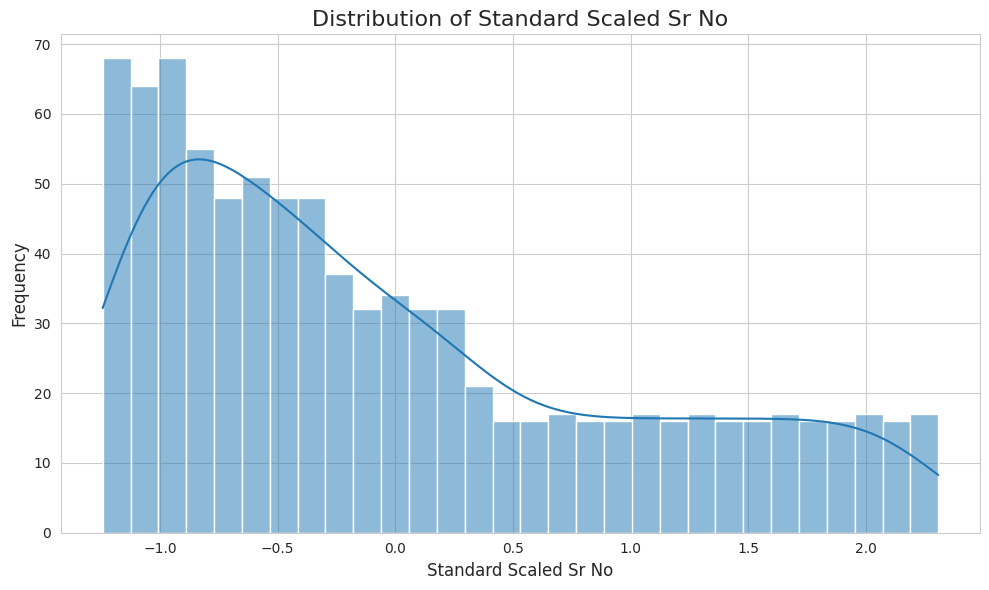

/tmp/ipython-input-3454227374.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Division', order=division_order, palette='viridis')


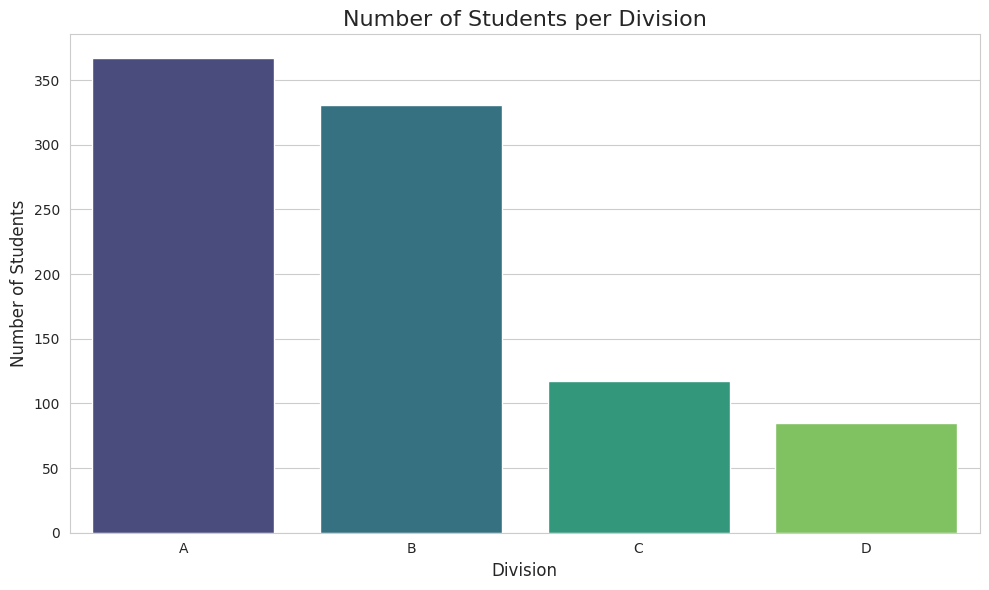

/tmp/ipython-input-3454227374.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='plasma')


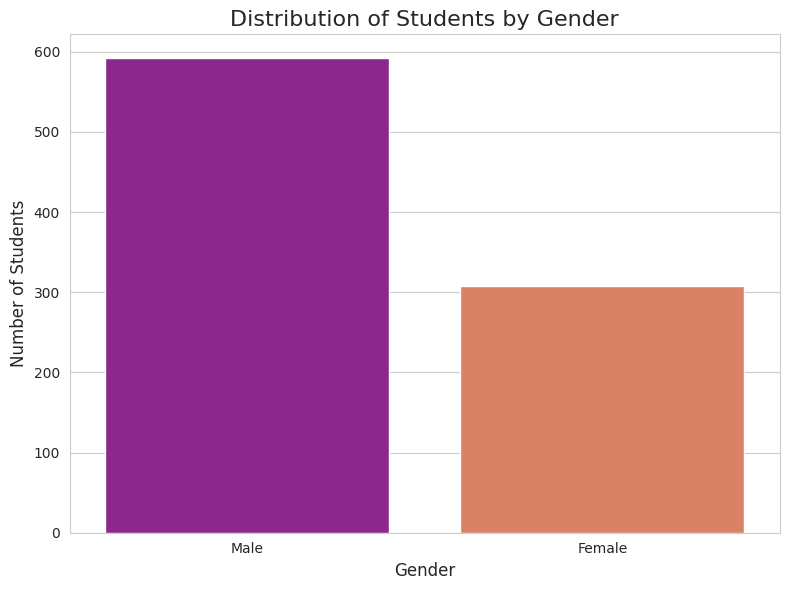

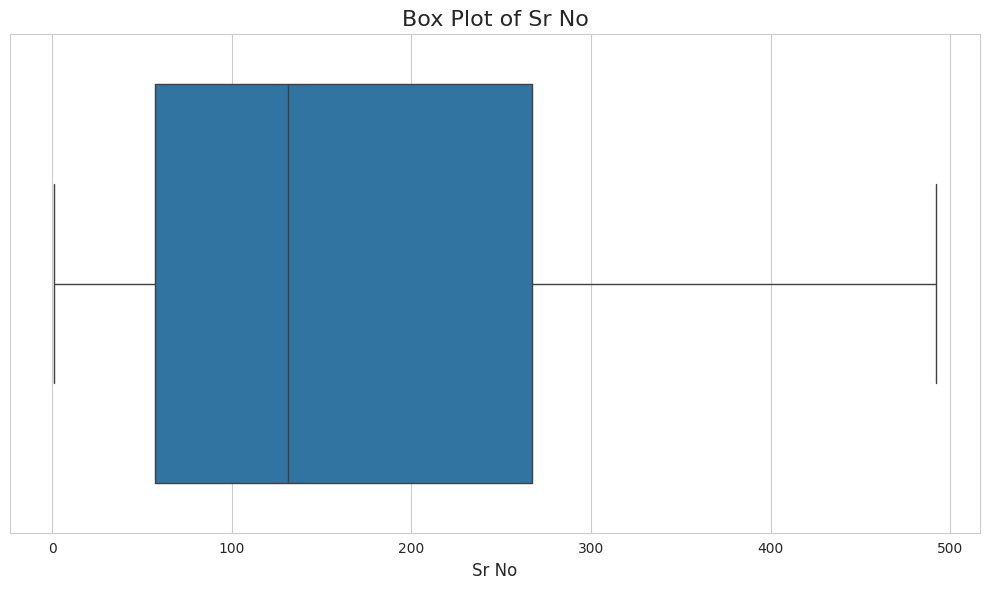

Generating plot for Course Name popularity...


/tmp/ipython-input-3454227374.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Course Name', order=df['Course Name'].value_counts().index, palette='magma')


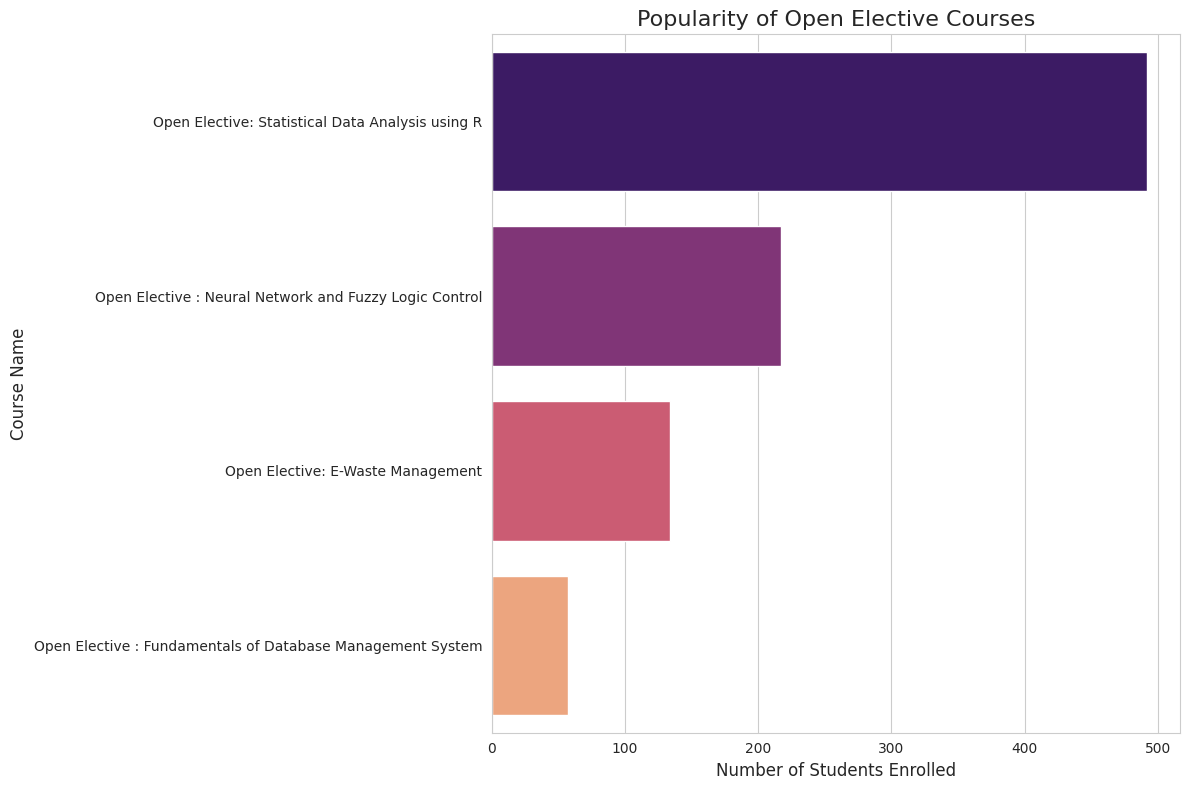

Generating Count Plot with Gender Hue...


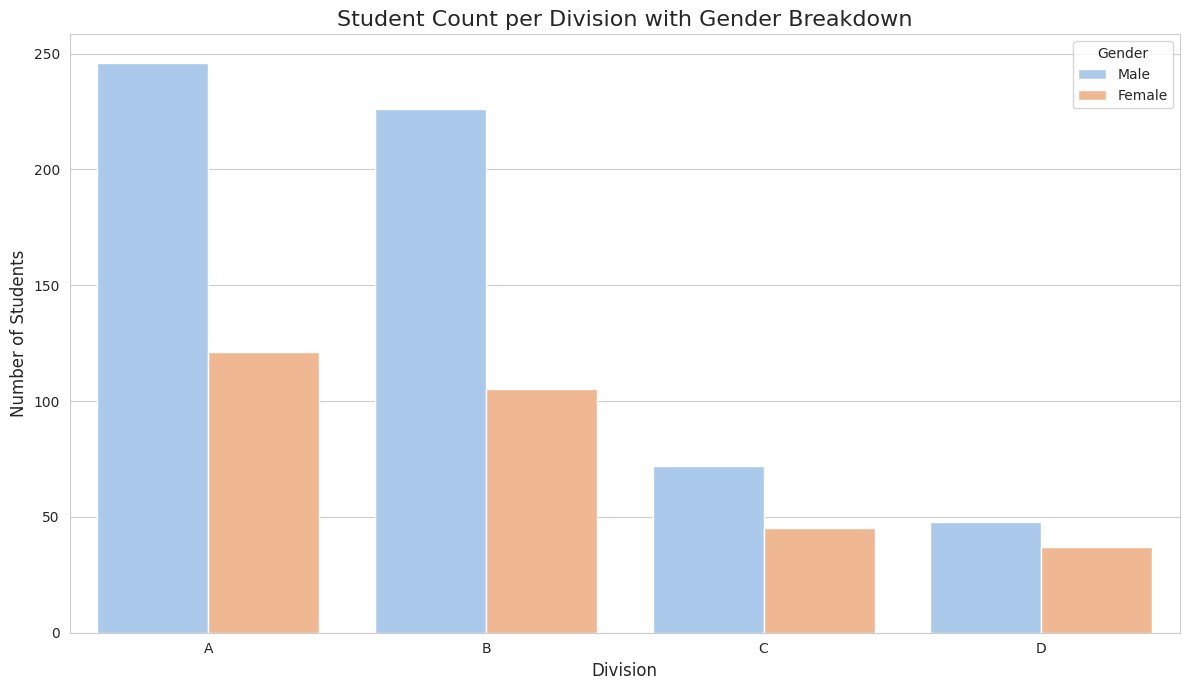


All plots have been displayed.


In [36]:
# --- Step 6: Add Various Plots for Visualization ---
sns.set_style("whitegrid")

# Plot 1: Histogram for a Scaled Numerical Column
plt.figure(figsize=(10, 6))
sns.histplot(df['Sr No_standard'], kde=True, bins=30)
plt.title('Distribution of Standard Scaled Sr No', fontsize=16)
plt.xlabel('Standard Scaled Sr No', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Bar Chart for a Categorical Column (Division)
plt.figure(figsize=(10, 6))
division_order = df['Division'].value_counts().index
sns.countplot(data=df, x='Division', order=division_order, palette='viridis')
plt.title('Number of Students per Division', fontsize=16)
plt.xlabel('Division', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 3: Bar Chart for Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='plasma')
plt.title('Distribution of Students by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 4: Box Plot for a Numerical Column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sr No')
plt.title('Box Plot of Sr No', fontsize=16)
plt.xlabel('Sr No', fontsize=12)
plt.tight_layout()
plt.show()

# --- Plot 5: Popularity of Open Elective Courses ---
# To visualize the frequency of a categorical variable with long labels like
# 'Course Name', a horizontal bar chart is the best choice. It prevents
# label overlapping and is easy to read.
print("Generating plot for Course Name popularity...")
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Course Name', order=df['Course Name'].value_counts().index, palette='magma')
plt.title('Popularity of Open Elective Courses', fontsize=16)
plt.xlabel('Number of Students Enrolled', fontsize=12)
plt.ylabel('Course Name', fontsize=12)
plt.tight_layout()
plt.show()


# --- Plot 6: Count Plot with Hue for Detailed Breakdown ---
# We can enhance a count plot by adding a 'hue' to break down
# categories by another variable. Here we see the gender
# breakdown within each division.
print("Generating Count Plot with Gender Hue...")
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Division', hue='Gender', order=division_order, palette='pastel')
plt.title('Student Count per Division with Gender Breakdown', fontsize=16)
plt.xlabel('Division', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

print("\nAll plots have been displayed.")